<a href="https://colab.research.google.com/github/2303A51259/AIML/blob/main/AIML_A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.
The size of training data is : 1382 
The size of testing data is : 346
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       404
           1       1.00      1.00      1.00       978

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382



AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

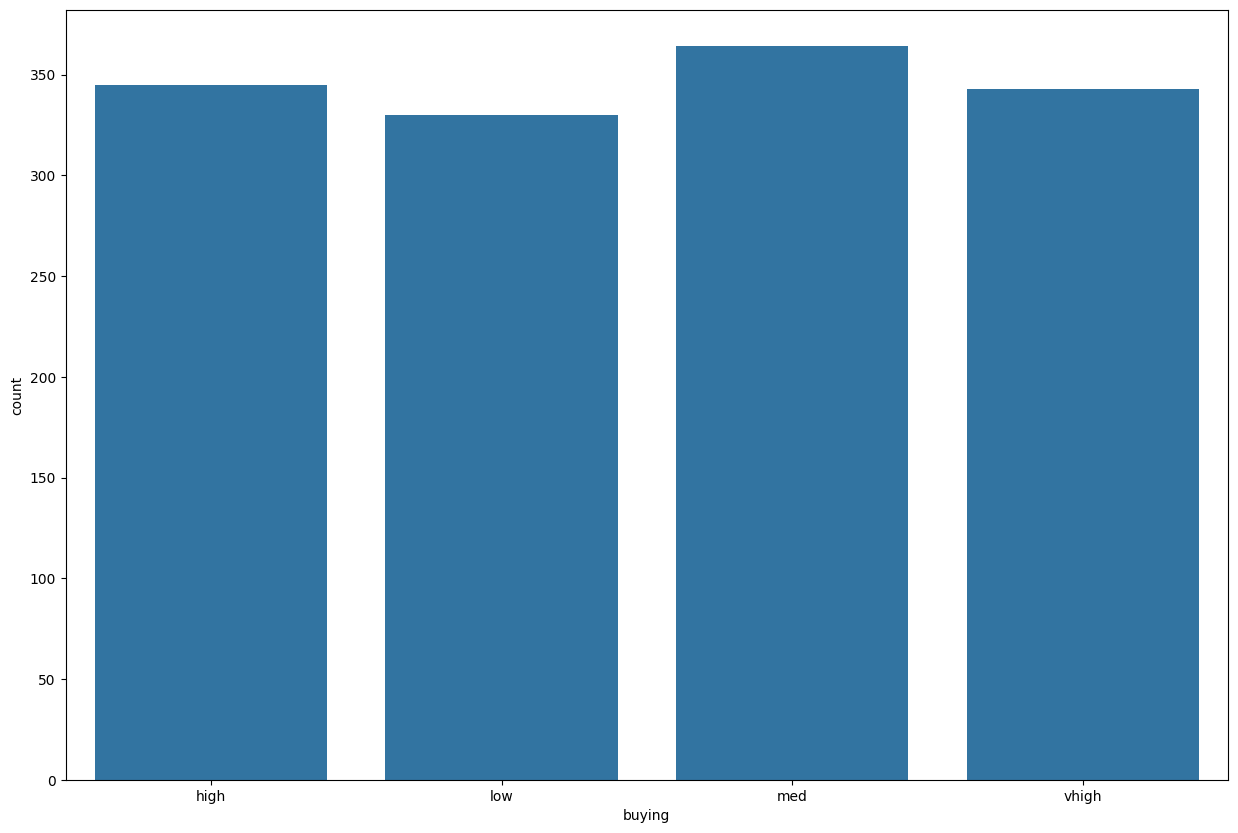

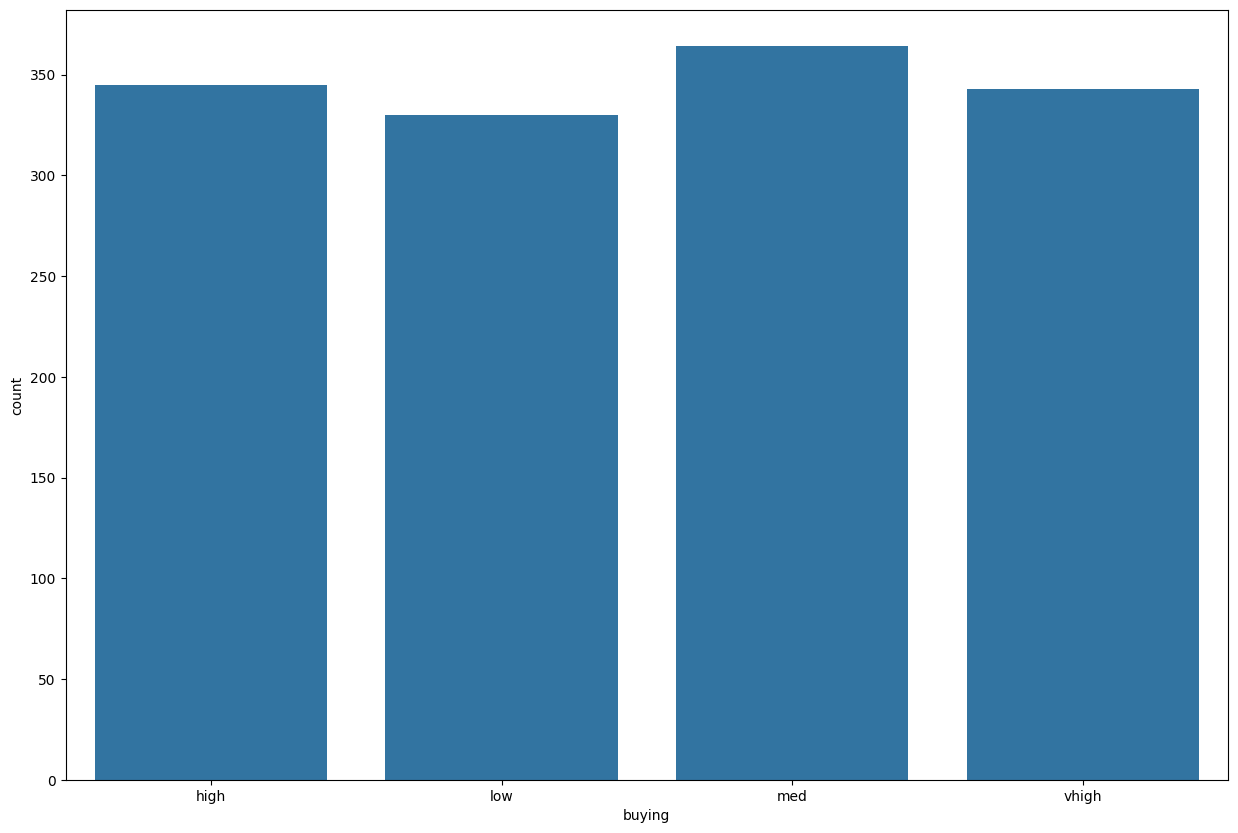

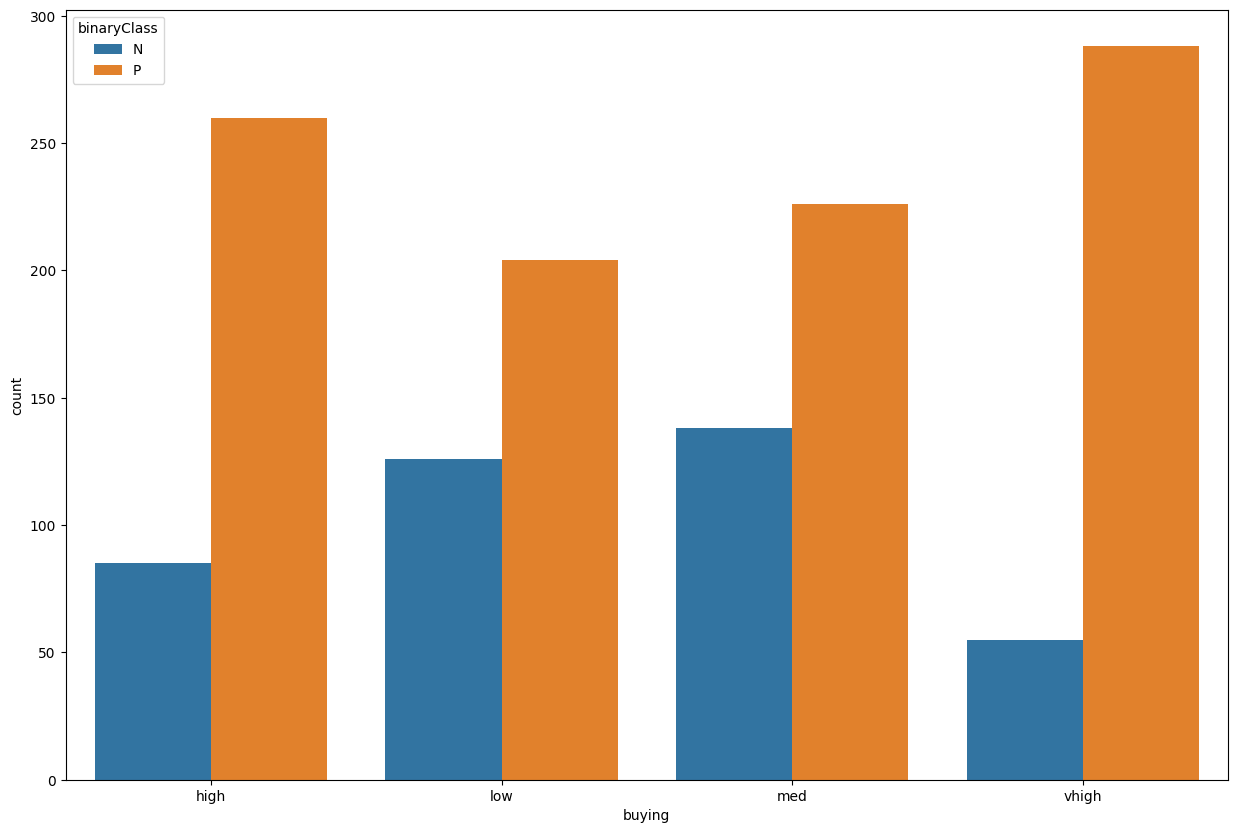

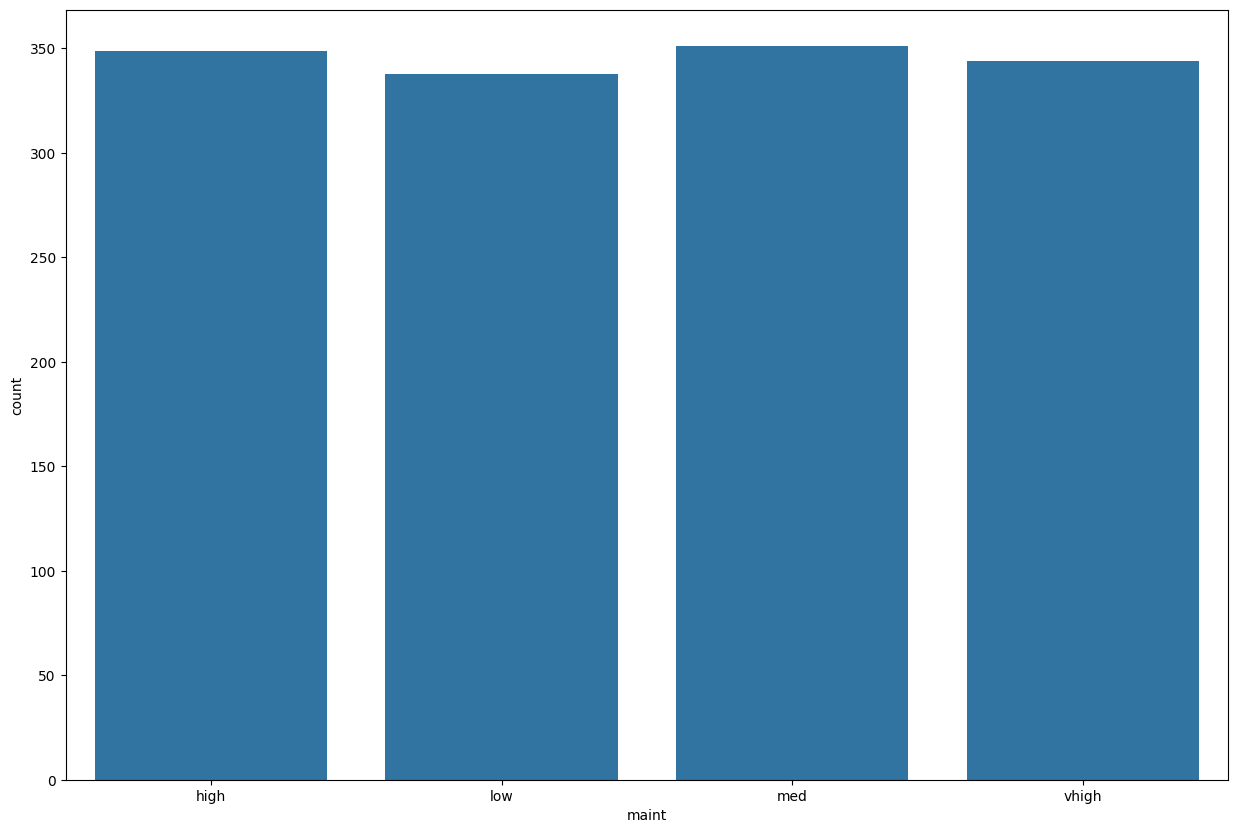

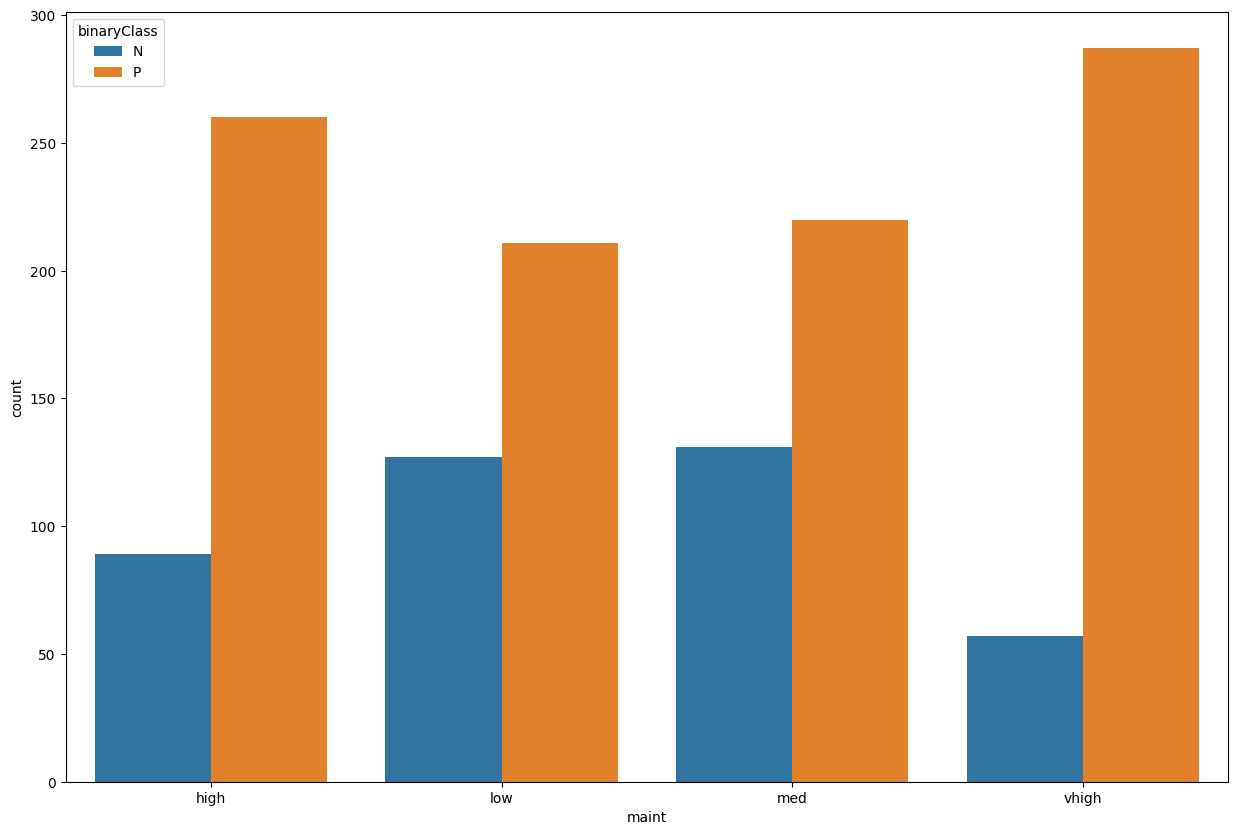

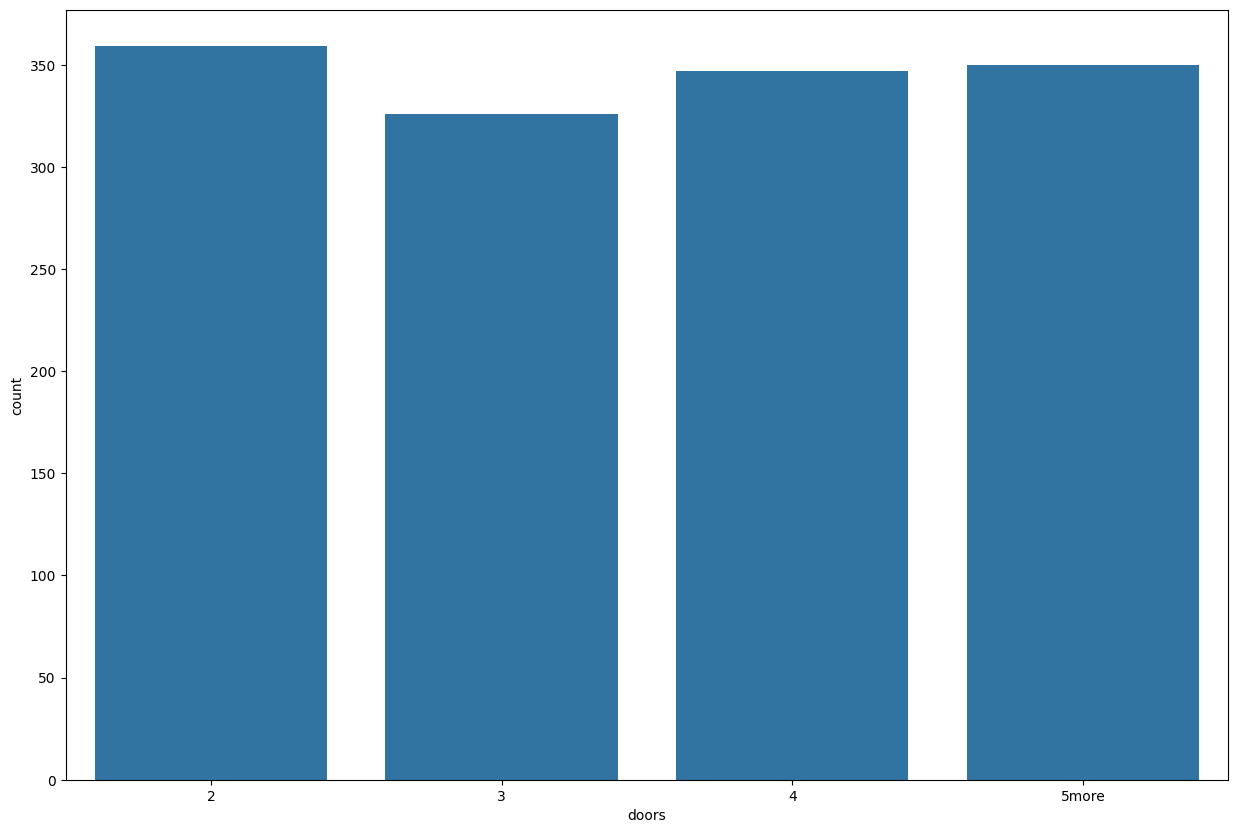

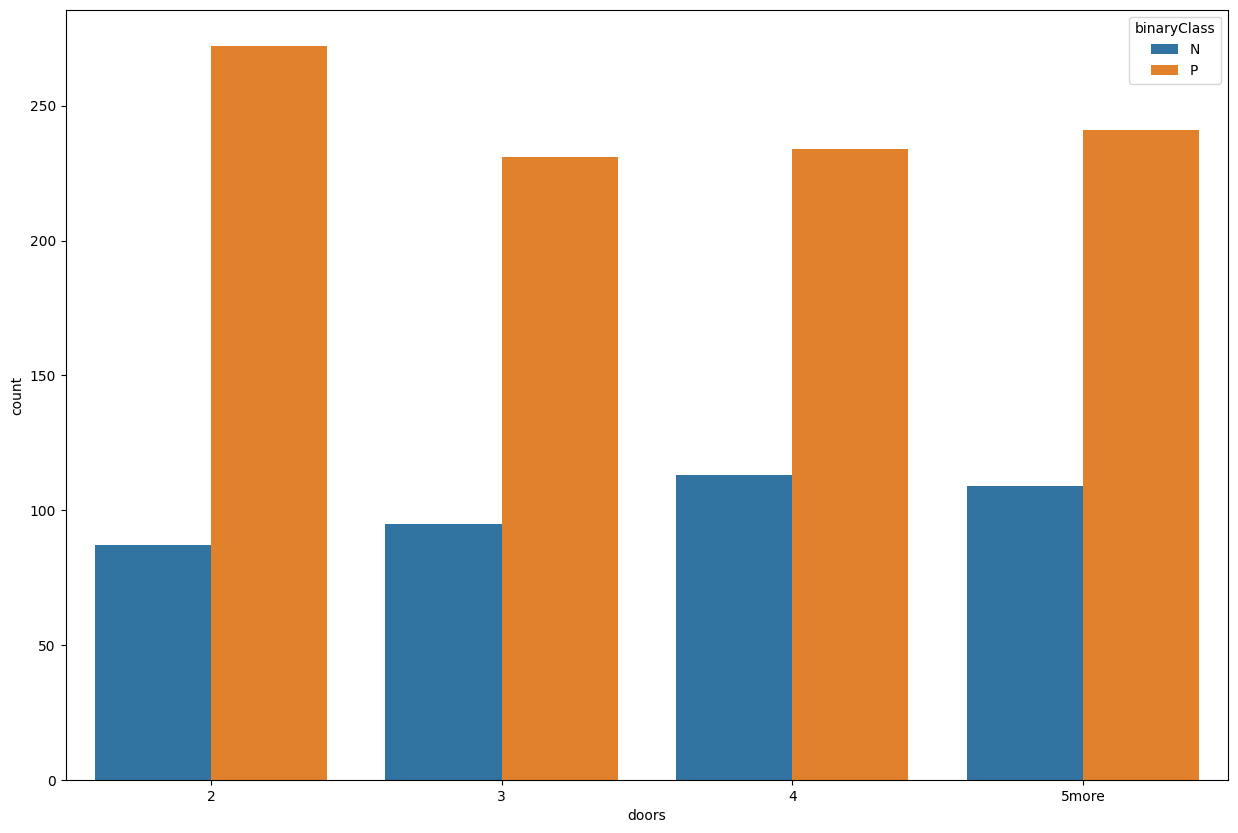

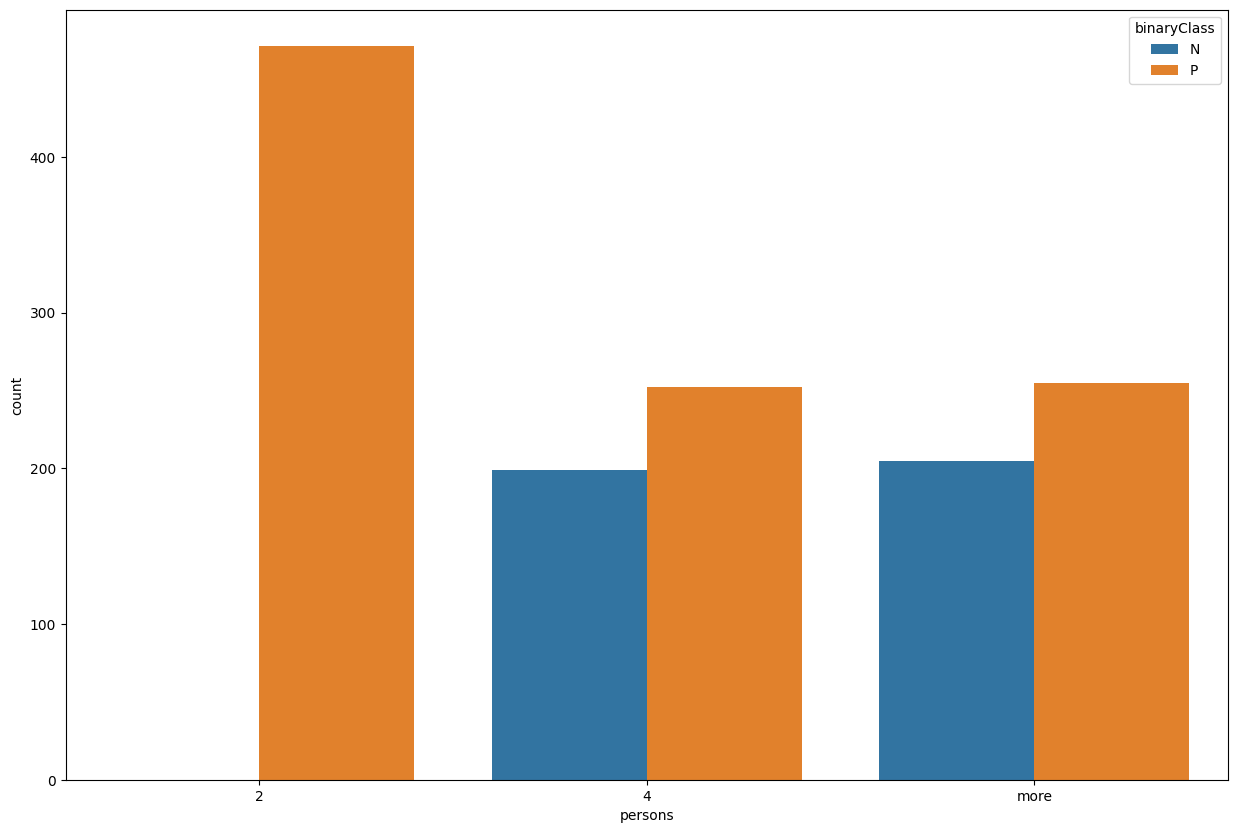

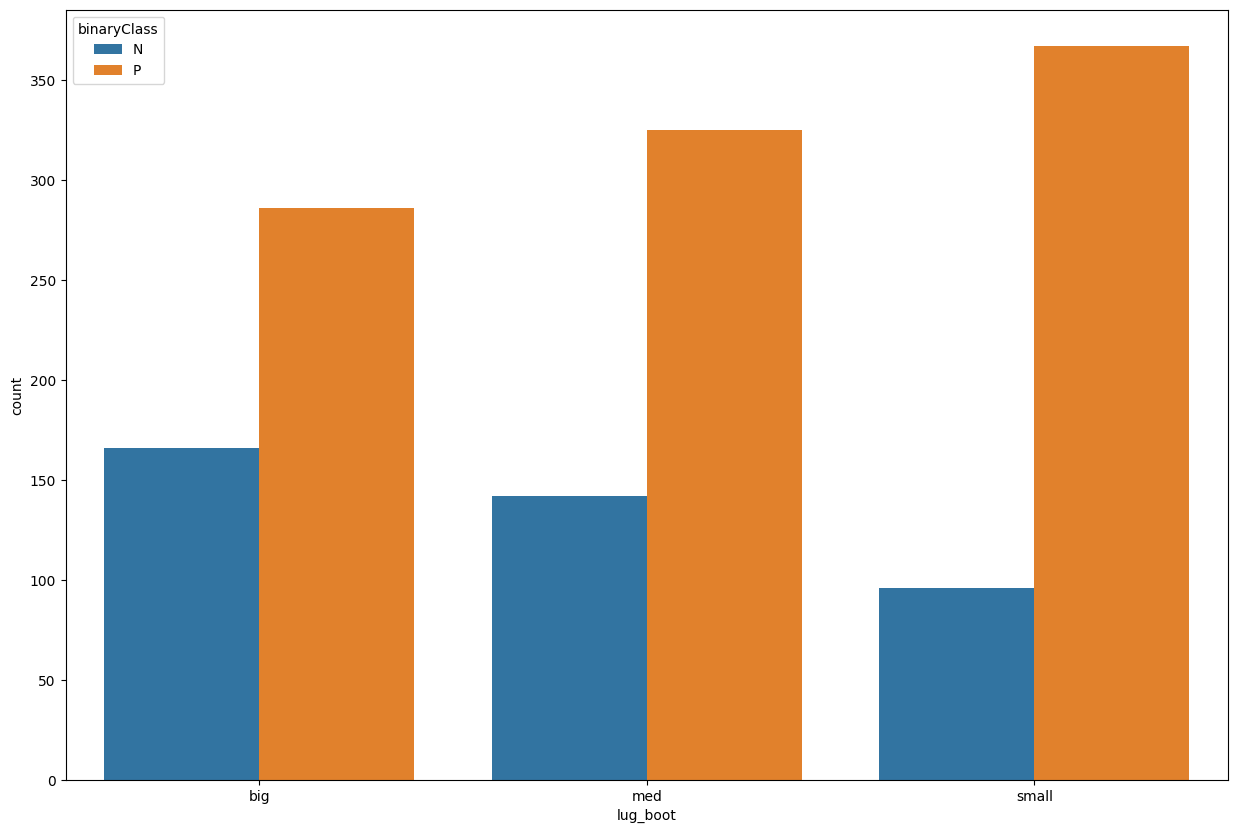

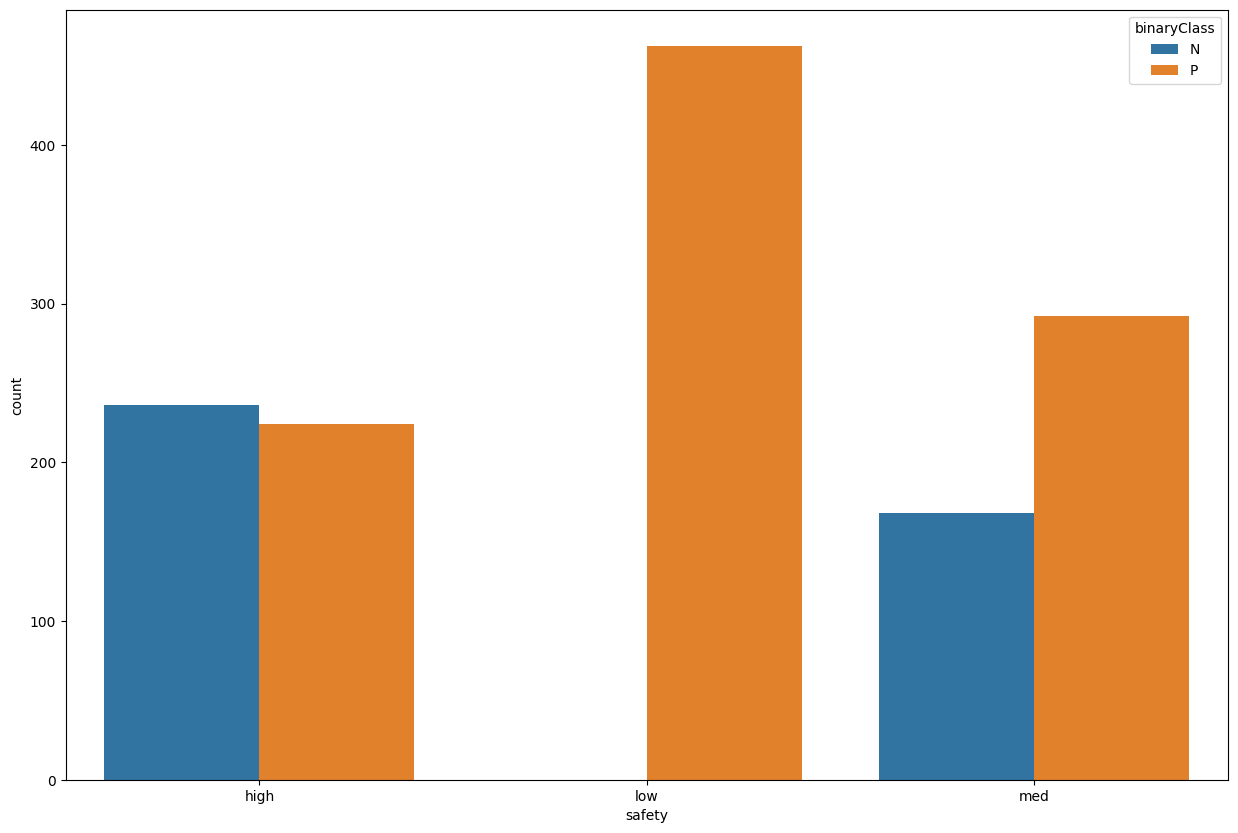

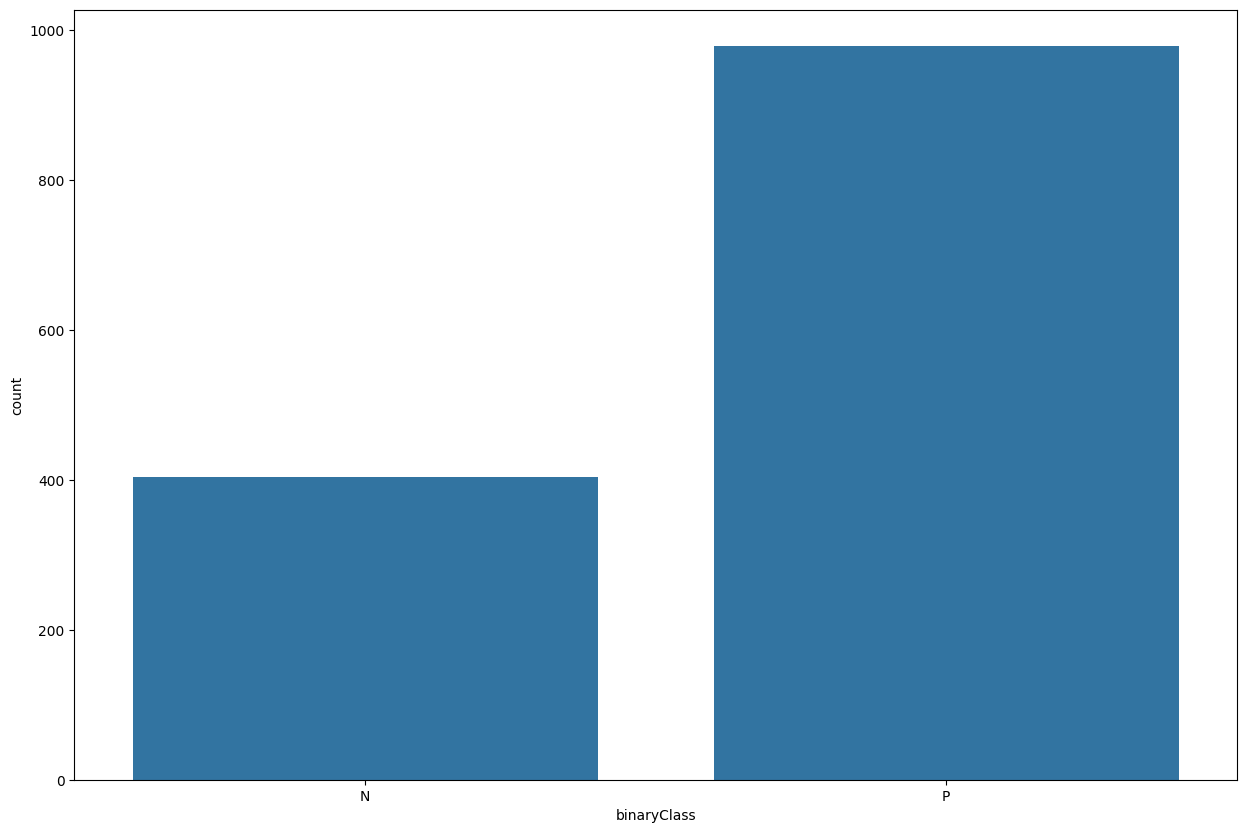

In [3]:
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml
cardata = fetch_openml(name='car', version=2,parser='auto')
type(cardata)
cardata.details['version']
print(cardata.DESCR)
cardata.feature_names
cardata = cardata.frame
cardata.head()
type(cardata)
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(cardata, test_size=0.2, random_state=20)
print('The size of training data is : {} \nThe size of testing data is : {}'.format(len(train_data), len(test_data)))
train_data.describe()
train_data.isnull().sum()
train_data['buying'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying')
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying')
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying', hue='binaryClass')
train_data['maint'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint')
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint', hue='binaryClass')
train_data['doors'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors')
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors', hue='binaryClass')
train_data['persons'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='persons', hue='binaryClass')
train_data['lug_boot'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='lug_boot', hue='binaryClass')
train_data['safety'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='safety', hue='binaryClass')
train_data['binaryClass'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='binaryClass')
car_train = train_data.drop('binaryClass', axis=1)
car_labels = train_data[['binaryClass']]
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('ord_enc', OrdinalEncoder())

])

car_train_prepared = pipe.fit_transform(car_train)
from sklearn.preprocessing import LabelEncoder


label_enc = LabelEncoder()

car_labels_prepared = label_enc.fit_transform(car_labels)
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

tree_clf.fit(car_train_prepared, car_labels_prepared)
from sklearn.metrics import accuracy_score

def accuracy(input_data,model,labels):
    preds = model.predict(input_data)
    acc = accuracy_score(labels,preds)
    return acc
from sklearn.metrics import confusion_matrix

def conf_matrix(input_data,model,labels):
    preds = model.predict(input_data)
    cm = confusion_matrix(labels,preds)
    return cm
from sklearn.metrics import classification_report

def class_report(input_data,model,labels):
    preds = model.predict(input_data)
    report = classification_report(labels,preds)
    report = print(report)
    return report
from sklearn.metrics import confusion_matrix

def conf_matrix(input_data,model,labels):
    preds = model.predict(input_data)
    cm = confusion_matrix(labels,preds)
    return cm
accuracy(car_train_prepared, tree_clf, car_labels_prepared)
conf_matrix(car_train_prepared, tree_clf, car_labels_prepared)
class_report(car_train_prepared, tree_clf, car_labels_prepared)
tree_clf.get_params()
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
params_grid = {'max_leaf_nodes': list(range(0, 10)),
               'min_samples_split': [0,1,2, 3, 4],
               'min_samples_leaf': [0,1,2, 3, 4],
               'max_depth':[0,1,2,3,4,5],
               'max_features':[0,1,2,3,4,5],
              'max_leaf_nodes':[0,1,2,3,4,5]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)
grid_search.best_params_
grid_search.best_estimator_
tree_best = grid_search.best_estimator_
cardata.columns
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(tree_best, feature_names=car_train.columns, class_names=['N','P']);
accuracy(car_train_prepared, tree_best, car_labels_prepared)
conf_matrix(car_train_prepared, tree_best, car_labels_prepared)
class_report(car_train_prepared, tree_best, car_labels_prepared)
car_test = test_data.drop('binaryClass', axis=1)
car_test_labels = test_data['binaryClass']
car_test_prepared = pipe.transform(car_test)
car_test_labels_prepared = label_enc.transform(car_test_labels)
accuracy(car_test_prepared, tree_best, car_test_labels_prepared)
conf_matrix(car_test_prepared, tree_best, car_test_labels_prepared)
class_report(car_test_prepared, tree_best, car_test_labels_prepared)
